In [1]:
import pandas as pd
import numpy as np
import matplotlib as mlt
import seaborn as sb

In [2]:
from google.colab import files
uploaded = files.upload()

Saving climatedata3.csv to climatedata3.csv


In [3]:
import io
df = pd.read_csv(io.BytesIO(uploaded['climatedata3.csv']))

In [4]:
df.head()

,MO,DY,T2M,QV2M,RH2M,PS,WS10M,PRECTCORR,RF
0,2,1,25.19,13.24,66.75,98.80,0.79,0,no-rain
1,2,2,24.51,12.88,67.31,98.75,1.09,0,no-rain
2,2,3,24.43,13.31,70.44,98.71,1.24,0,no-rain
3,2,4,25.18,14.40,72.81,98.68,1.16,0,no-rain
4,2,5,24.08,12.94,69.00,98.66,1.30,1,rain


In [5]:
df.describe()

,MO,DY,T2M,QV2M,RH2M,PS,WS10M,PRECTCORR
count,14669.000000,14669.000000,14669.000000,14669.000000,14669.000000,14669.000000,14669.000000,14669.000000
mean,6.506851,15.727861,24.759191,17.185066,86.962142,98.745955,1.389886,0.854932
std,3.451311,8.799549,1.231455,2.121703,7.750368,0.159727,0.311617,0.352181
min,1.000000,1.000000,18.280000,6.840000,39.500000,98.200000,0.460000,0.000000
25%,3.000000,8.000000,23.990000,16.780000,85.440000,98.630000,1.160000,1.000000
50%,7.000000,16.000000,24.840000,17.700000,89.560000,98.750000,1.370000,1.000000
75%,10.000000,23.000000,25.620000,18.490000,91.690000,98.860000,1.580000,1.000000
max,12.000000,31.000000,28.750000,20.940000,97.440000,99.280000,2.910000,1.000000


In [6]:
df.RF.value_counts()

rain       12541
no-rain     2128
Name: RF, dtype: int64

In [7]:
df["PRECTCORR"].value_counts()

1    12541
0     2128
Name: PRECTCORR, dtype: int64

In [8]:
df.RF.replace({"no-rain":0, "rain":1}, inplace=True)

In [9]:
df.RF.value_counts()

1    12541
0     2128
Name: RF, dtype: int64

In [10]:
from sklearn.utils import resample
df_rain = df[df.RF == 1]
df_norain = df[df.RF != 1]
df_minority_upsampled = resample(df_norain, replace=True,n_samples=6000)
new_df = pd.concat([df_rain, df_minority_upsampled])

In [11]:
from sklearn.utils import shuffle
df = shuffle(new_df)

In [12]:
df.RF.value_counts()

1    12541
0     6000
Name: RF, dtype: int64

In [13]:
df.corr()

,MO,DY,T2M,QV2M,RH2M,PS,WS10M,PRECTCORR,RF
MO,1.000000,0.062097,-0.152410,0.065717,0.204090,0.227451,-0.272503,0.069694,0.069694
DY,0.062097,1.000000,0.003145,0.001948,0.001203,-0.009920,-0.025648,-0.004552,-0.004552
T2M,-0.152410,0.003145,1.000000,0.745231,0.394759,-0.469393,-0.516686,0.337094,0.337094
QV2M,0.065717,0.001948,0.745231,1.000000,0.901294,-0.162216,-0.433217,0.714010,0.714010
RH2M,0.204090,0.001203,0.394759,0.901294,1.000000,0.107685,-0.289757,0.769870,0.769870
PS,0.227451,-0.009920,-0.469393,-0.162216,0.107685,1.000000,0.180050,0.116127,0.116127
WS10M,-0.272503,-0.025648,-0.516686,-0.433217,-0.289757,0.180050,1.000000,-0.152781,-0.152781
PRECTCORR,0.069694,-0.004552,0.337094,0.714010,0.769870,0.116127,-0.152781,1.000000,1.000000
RF,0.069694,-0.004552,0.337094,0.714010,0.769870,0.116127,-0.152781,1.000000,1.000000


<Axes: >

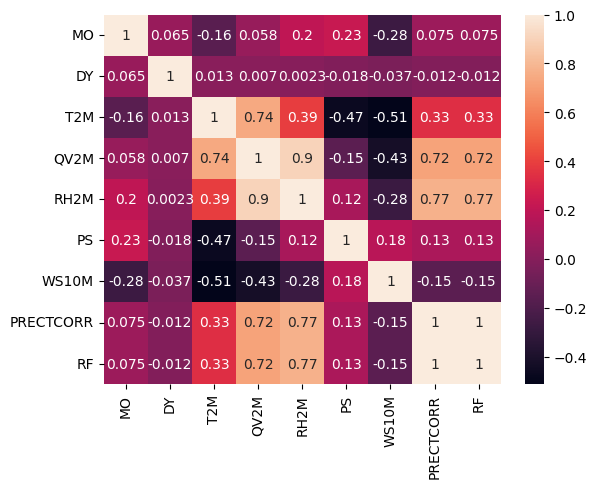

In [ ]:
sb.heatmap(df.corr(), annot = True)

In [ ]:
X = df.drop(["RF",'PRECTCORR'], axis=1)
Y = df["RF"]

In [ ]:
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn import metrics

In [ ]:
name = list(df.columns)
models = []
models.append(("LR", LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(("ADA", AdaBoostClassifier()))
models.append(("GRA", GradientBoostingClassifier()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
  kfold = model_selection.KFold(n_splits=10)
  cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

LR: 0.898010 (0.007092)
LDA: 0.893156 (0.009143)
KNN: 0.921525 (0.007255)
CART: 0.953886 (0.003538)
NB: 0.894451 (0.006858)
SVM: 0.897525 (0.006985)
ADA: 0.905884 (0.004586)
GRA: 0.916725 (0.004372)


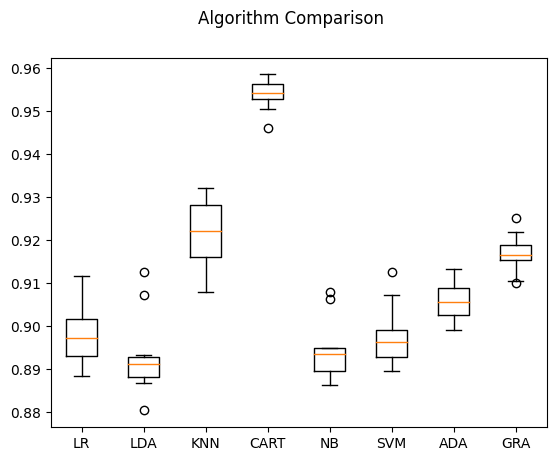

In [ ]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25)

In [ ]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
y_knn = knn.predict(X_test)

<Axes: >

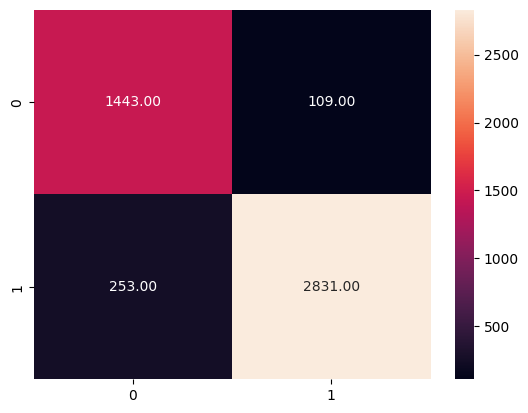

In [ ]:
cm = metrics.confusion_matrix( y_test, y_knn)
sb.heatmap( cm, annot=True, fmt=".2f")

In [ ]:
print(metrics.classification_report(y_test,y_knn))

              precision    recall  f1-score   support

           0       0.85      0.93      0.89      1552
           1       0.96      0.92      0.94      3084

    accuracy                           0.92      4636
   macro avg       0.91      0.92      0.91      4636
weighted avg       0.93      0.92      0.92      4636



In [ ]:
cart = DecisionTreeClassifier()
cart.fit(X_train,y_train)
y_cart = cart.predict(X_test)

<Axes: >

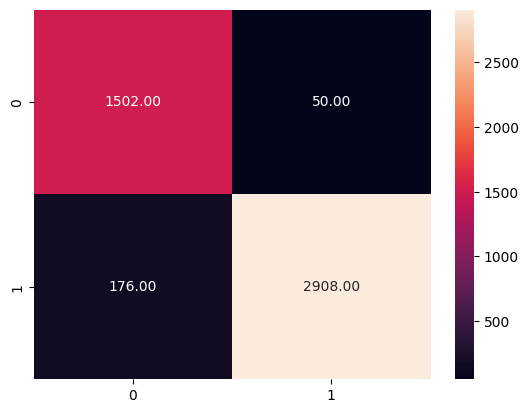

In [ ]:
cm = metrics.confusion_matrix( y_test, y_cart)
sb.heatmap( cm, annot=True, fmt=".2f")

In [ ]:
print(metrics.classification_report(y_test,y_cart))

              precision    recall  f1-score   support

           0       0.90      0.97      0.93      1552
           1       0.98      0.94      0.96      3084

    accuracy                           0.95      4636
   macro avg       0.94      0.96      0.95      4636
weighted avg       0.95      0.95      0.95      4636



In [ ]:
gra = GradientBoostingClassifier()
gra.fit(X_train,y_train)
y_gra = gra.predict(X_test)

<Axes: >

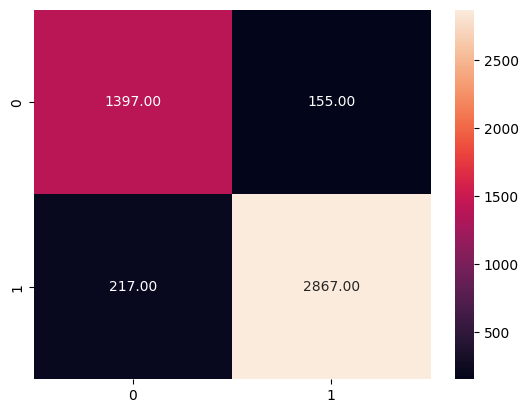

In [ ]:
cm = metrics.confusion_matrix( y_test, y_gra)
sb.heatmap( cm, annot=True, fmt=".2f")

In [ ]:
print(metrics.classification_report(y_test,y_gra))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1524
           1       0.95      0.92      0.94      3112

    accuracy                           0.92      4636
   macro avg       0.90      0.92      0.91      4636
weighted avg       0.92      0.92      0.92      4636



In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

# Define the artificial neural network model
ann = MLPClassifier(hidden_layer_sizes=(50, ), max_iter=500, random_state=42)

# Train the model
ann.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = ann.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.86      0.86      1552
           1       0.93      0.92      0.93      3084

    accuracy                           0.90      4636
   macro avg       0.89      0.89      0.89      4636
weighted avg       0.90      0.90      0.90      4636



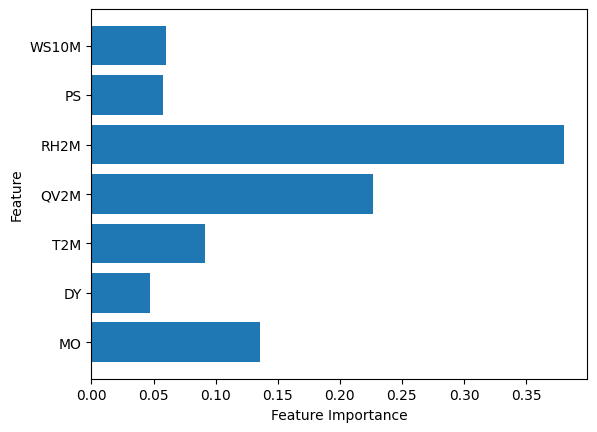

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# Define the Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf.fit(X_train, y_train)

# Compute feature importances
feature_importances = rf.feature_importances_

# Plot feature importances
plt.barh(range(X.shape[1]), feature_importances, align='center')
plt.yticks(range(X.shape[1]), list(X.columns))
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()